# ADD eCNN_120 ENSEMBLE

In [1]:
from Binaries import *

SanityCheck = Ensemble("120_eCNN_Downsampled_AllEnergies_5_0VEM")
container = SanityCheck.get_accuracy("validation_data_no_cuts")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 40, 4)          40        
                                                                 
 conv1d (Conv1D)             (None, 1, 36, 2)          42        
                                                                 
 flatten (Flatten)           (None, 72)                0         
                                                                 
 dense (Dense)               (None, 10)                730       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 834
Trainable params: 834
Non-trainable params: 0
_________________________________________________________________

ENSEMBLE_120_eCNN_Downsampled_AllEnergies_5_0VEM: 10 mode

In [2]:
xs, y, yerr = [], [], []

for prior in ["0.05", "0.15", "0.25", "0.35", "0.45", "0.55", "0.65", "0.75", "0.85", "0.95"]:

    Trigger = NNClassifier(f"120_eCNN_Downsampled_AllEnergies_p{prior}", supress_print = True)
    TP, _, _, FN = Trigger.load_and_print_performance("validation_data_no_cuts")
    x, o = float(len(TP)), float(len(FN))
    accuracy = x / (x + o)
    err = 1/(x+o)**2 * np.sqrt( x**3 + o**3 - 2 * np.sqrt((x * o)**3) )

    xs.append(float(prior))
    y.append(accuracy)
    yerr.append(err)


Classifier                                    Dataset                                  TP      FP      TN      FN
120_eCNN_Downsampled_AllEnergies_p0.05        validation_data_no_cuts               24229       0       0   25843 -> ACC =  48.39%
120_eCNN_Downsampled_AllEnergies_p0.15        validation_data_no_cuts               24401       0       0   25671 -> ACC =  48.73%
120_eCNN_Downsampled_AllEnergies_p0.25        validation_data_no_cuts                  63       0       0      69 -> ACC =  47.73%
120_eCNN_Downsampled_AllEnergies_p0.35        validation_data_no_cuts                9100       0       0   10325 -> ACC =  46.85%
120_eCNN_Downsampled_AllEnergies_p0.45        validation_data_no_cuts               24207       0       0   25865 -> ACC =  48.34%
120_eCNN_Downsampled_AllEnergies_p0.55        validation_data_no_cuts                2184       0       0    2212 -> ACC =  49.68%
120_eCNN_Downsampled_AllEnergies_p0.65        validation_data_no_cuts               24548       0  

0.02387238203942378 0.010659647461552839


/tmp/ipykernel_1240682/1009629918.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  err = lambda x: np.sqrt( np.array([x,1]).T @ cov @ np.array([x,1]) )


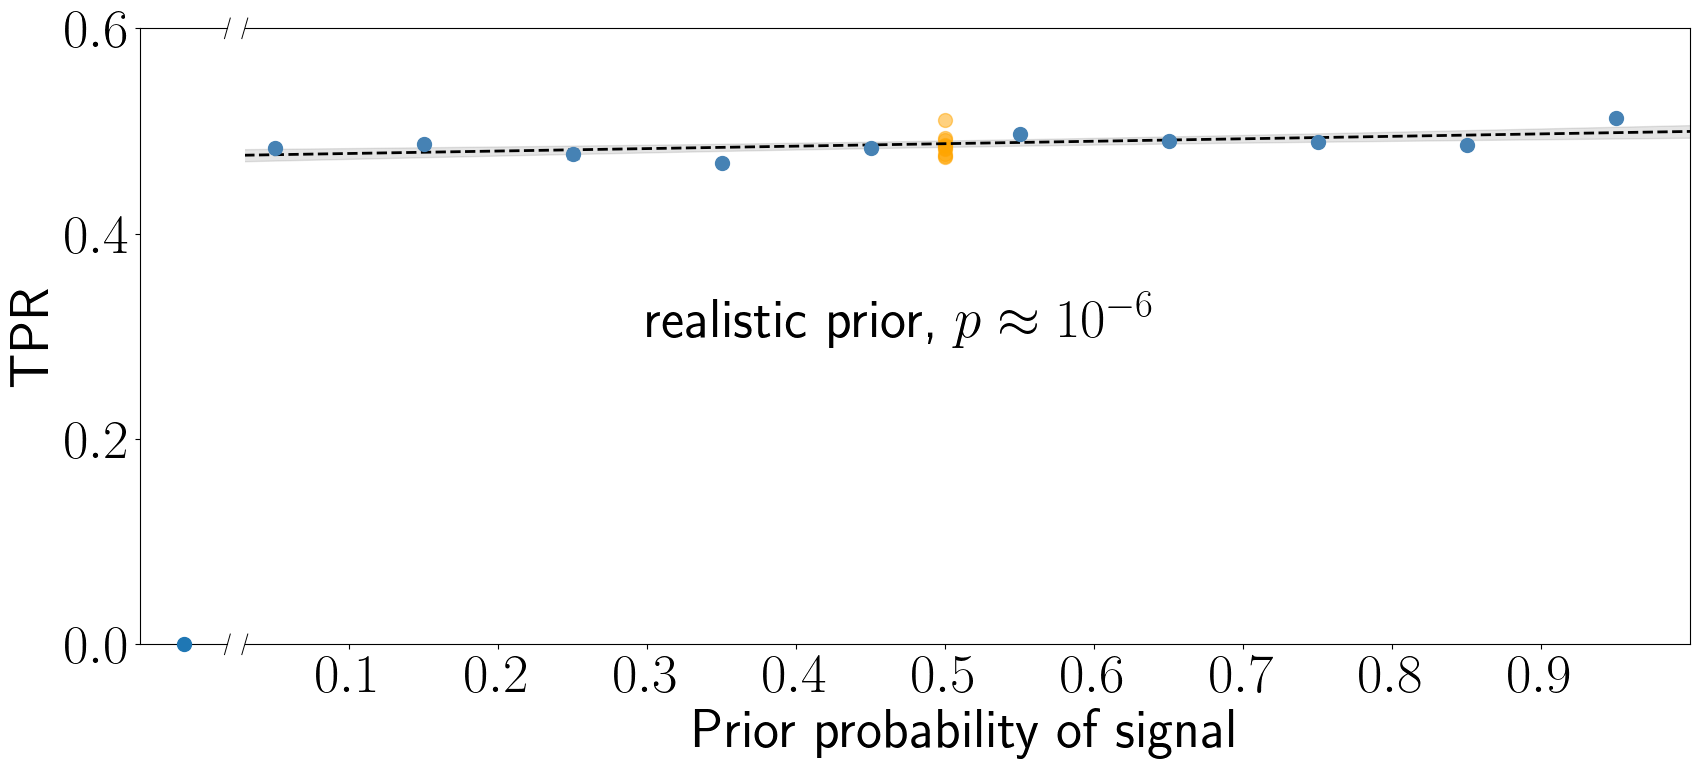

In [4]:
fig = plt.figure(figsize = (20, 8))

ax1 = plt.subplot2grid((1, 15), (0, 1), colspan = 14, fig = fig)
ax2 = plt.subplot2grid((1, 15), (0, 0), fig = fig)

p, cov = np.polyfit(xs, y, deg = 1, cov = True)
err = lambda x: np.sqrt( np.array([x,1]).T @ cov @ np.array([x,1]) )

f = np.poly1d(p)
X = np.linspace(0, 1, 10)
Y = f(X)
top, bottom = Y + err(X), Y - err(X)

ax1.errorbar(xs, y, yerr = yerr, capsize = 4, markersize = 10, color = "steelblue", fmt = "o")
ax1.plot(X, Y, ls = "--", lw = 2, c = "k")
ax1.fill_between(X, top, bottom, alpha = 0.1, color = "k")

print(p[0], np.sqrt(cov[0][0]))

ax2.errorbar(1.0431e-6, 0, fmt = "o", markersize = 10, clip_on=False, zorder = 10)
ax2.set_xlim(1.0431e-6 - 0.3, 1.0431e-6 + 0.3)

ax1.set_ylim(0, 0.6)
ax2.set_ylim(0, 0.6)
ax1.set_xlim(0.03, 1)

ax1.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax1.set_xticks(np.arange(0.1, 0.99, 0.1))
ax1.set_yticks([], [])
ax2.set_xticks([])

kwargs = dict(color='k', clip_on=False, lw = 0.7)
ax1.plot([0.028, 0.032], [0.59, 0.61], **kwargs)
ax1.plot([0.028, 0.032], [-0.01, 0.01], **kwargs)
ax2.plot([1.0431e-6 + 0.3 - 0.02, 1.0431e-6 + 0.3 + 0.02], [0.59, 0.61], **kwargs)
ax2.plot([1.0431e-6 + 0.3 - 0.02, 1.0431e-6 + 0.3 + 0.02], [-0.01, 0.01], **kwargs)

ax1.annotate(r"realistic prior, $p \approx 10^{-6}$", (0.3,0.3),
             zorder = 100)

ax1.set_xlabel("Prior probability of signal")
ax2.set_ylabel("TPR")

ensemble_accuracies = container[0]

ax1.scatter([0.5 for _ in range(len(ensemble_accuracies))], 0.165 + ensemble_accuracies + np.random.normal(0, 0.01, len(ensemble_accuracies)), c = "orange", alpha = 0.5, s = 100)


# ax.annotate('a polar annotation',
#             xy=(thistheta, thisr),  # theta, radius
#             xytext=(0.05, 0.05),    # fraction, fraction
#             textcoords='figure fraction',
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             horizontalalignment='left',
#             verticalalignment='bottom')